# Script for the visualization

We'll create a function that inputs the list of skills we want to look for, and output a visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('export_usa.csv')
data

,pos_clean,descr_cl
0,development director,Development DirectorALS Therapy Development In...
1,an ostentatiously-excitable principal research...,"Job Description""The road that leads to accompl..."
2,data scientist,"Growing company located in the Atlanta, GA are..."
3,data analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,assistant professor -tt - signal processing & ...,DESCRIPTIONThe Emory University Department of ...
...,...,...
6948,data developer / machine learning analyst,Are you data-driven? We at NetApp believe in t...
6949,scientist i,Pharmacyclics is committed to the development ...
6950,intern scientist,"Oath, a subsidiary of Verizon, is a values-led..."
6951,senior data & applied scientist,We are the Bing Core Relevance team responsibl...


In [16]:
#Function inputs

position = "data scientist" #input a string 
keywords = ['python','r','statistics','sql','model','ai',
            'mining','tableau','scikit','pandas','ml',
            'excel','visualization','databases','help',
            'algorithms','analytics','interpersonal',
            'analyze','training','communication','leadership']

position_words = position.lower().replace("data"," ").strip().split()
position_words

#If not a string, break function and print error message

['scientist']

In [17]:
#Creating a reduced dataset following position, and counting the number of matches of the search 
data['pos-in-data'] =[True if all (word in position for word in position_words) else False for position in data['pos_clean'] ]

reduced_data = data[data['pos-in-data']]

num_of_matches = len(reduced_data)
reduced_data.head()


,pos_clean,descr_cl,pos-in-data
1,an ostentatiously-excitable principal research...,"Job Description""The road that leads to accompl...",True
2,data scientist,"Growing company located in the Atlanta, GA are...",True
7,"junior to mid-level engineer, geologist or env...",Overview / ResponsibilitiesWood Environment &a...,True
9,senior associate - cognitive data scientist na...,Known for being a great place to work and buil...,True
11,health scientist iii-cpts,"Chenega Professional &amp; Technical Services,...",True


In [18]:
#Now we split the descriptions, turn it in a list and we remove all stopwords that have no meaning for our analysis 
#we declare a function for it 
def remove_stop_split(x):
    import re
    """
    This function will have a string as an input, check all the words inside and return a string without
    any of these stopwords, and in lowercase.
    """
    stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
        "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
        "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
        "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
        "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
        "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
        "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at",
        "by", "for", "with", "about", "against", "between", "into", "through", "during",
        "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", 
        "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
        "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
        "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
        "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    out = []
    descr = re.sub(r'[^\w\s]+'," ",x)
    for word in descr.split():
        if word not in stop:
            out.append(word.lower())
    return out

#and we execute the cleaning 
reduced_data['descr_words'] = [remove_stop_split(des) for des in reduced_data['descr_cl']]
reduced_data



<ipython-input-18-e19cd6abec84>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data['descr_words'] = [remove_stop_split(des) for des in reduced_data['descr_cl']]


,pos_clean,descr_cl,pos-in-data,descr_words
1,an ostentatiously-excitable principal research...,"Job Description""The road that leads to accompl...",True,"[job, description, the, road, leads, accomplis..."
2,data scientist,"Growing company located in the Atlanta, GA are...",True,"[growing, company, located, atlanta, ga, area,..."
7,"junior to mid-level engineer, geologist or env...",Overview / ResponsibilitiesWood Environment &a...,True,"[overview, responsibilitieswood, environment, ..."
9,senior associate - cognitive data scientist na...,Known for being a great place to work and buil...,True,"[known, great, place, work, build, career, kpm..."
11,health scientist iii-cpts,"Chenega Professional &amp; Technical Services,...",True,"[chenega, professional, amp, technical, servic..."
...,...,...,...,...
6947,senior data scientist (gec11902),Position DescriptionProficient in Java or Pyth...,True,"[position, descriptionproficient, java, python..."
6949,scientist i,Pharmacyclics is committed to the development ...,True,"[pharmacyclics, committed, development, commer..."
6950,intern scientist,"Oath, a subsidiary of Verizon, is a values-led...",True,"[oath, subsidiary, verizon, values, led, compa..."
6951,senior data & applied scientist,We are the Bing Core Relevance team responsibl...,True,"[we, bing, core, relevance, team, responsible,..."


In [19]:
# We create a dictionary with the inputted strings, the count, and we calcualte its percentage 
skills=[]
count=[]
percentage=[]
for skill in keywords:
    skills.append(skill)
    word_check = [True if skill in descr else False for descr in reduced_data['descr_words']]
    count.append(sum (word_check))
    percentage.append(sum(word_check)*100/len(word_check))
    
dict = {'Skill': skills, 'Count': count, '% Total': percentage}


In [20]:
#and we create a dataframe 
df = pd.DataFrame(dict)
df = df.sort_values(by=['% Total'],ascending = False)
df = df.reset_index(drop = True)
df

,Skill,Count,% Total
0,communication,1421,53.724008
1,python,1277,48.279773
2,r,1176,44.461248
3,statistics,1096,41.436673
4,help,1029,38.903592
5,analytics,903,34.139887
6,algorithms,799,30.207940
7,sql,669,25.293006
8,analyze,632,23.894140
9,mining,484,18.298677


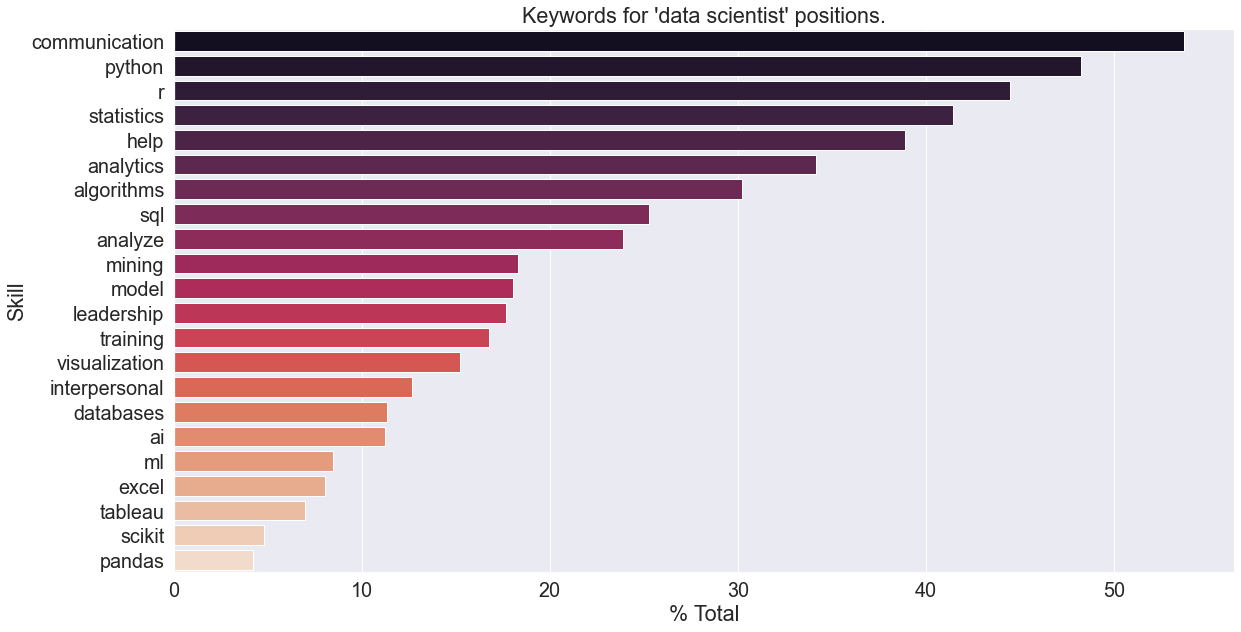

In [21]:
#We want to visualze the percentage of appearances of each skill in all data scientist job postings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

fig_title = "Keywords for '"+ position+ "' positions."

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.8)  # crazy big
plt.figure(figsize=(19, 10))
sns_plot = sns.barplot(y='Skill',x = '% Total', data = df,palette="rocket",).set_title(fig_title)


fig = sns_plot.get_figure()
